<a href="https://colab.research.google.com/github/ASAbuSayem/The-Boston-Housing-Dataset-in-Machine-Learning/blob/main/The_Boston_Housing_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/drive/MyDrive/ML Assignment 2024/housing.csv', header=None, delimiter=r'\s+', names=column_names)

In [ ]:
# Data preprocessing
# Checking for missing values
if data.isnull().sum().any():
    print("Dataset contains missing values. Filling missing values with median.")
    data = data.fillna(data.median())

In [ ]:
# Splitting features and target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [ ]:
# Splitting dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scaling features for SVM (optional but improves performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the SVM regression model
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)  # Adjust parameters as needed
svm_model.fit(X_train, y_train)

SVR(C=100)

In [ ]:
# Predicting on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Printing evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 2.16
Mean Squared Error (MSE): 12.07
Root Mean Squared Error (RMSE): 3.47
R-squared (R2): 0.84


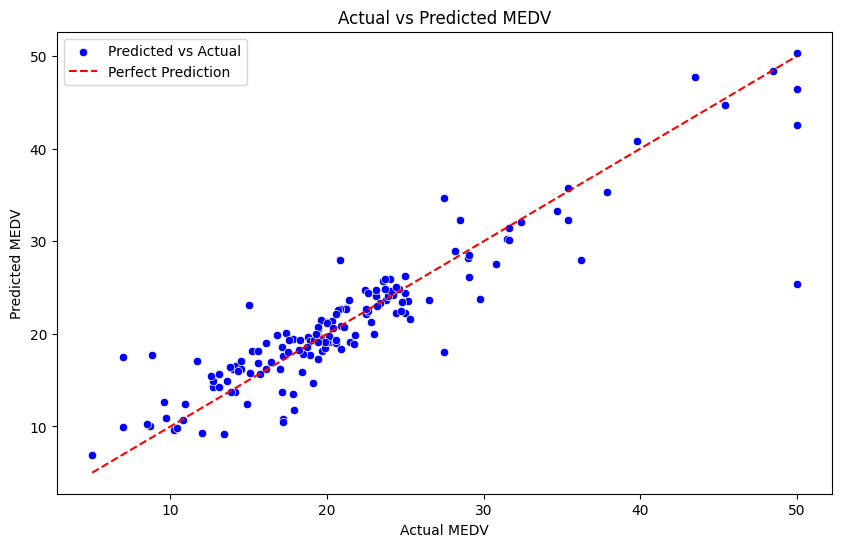

In [ ]:
# Visualizing results
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.legend()
plt.show()

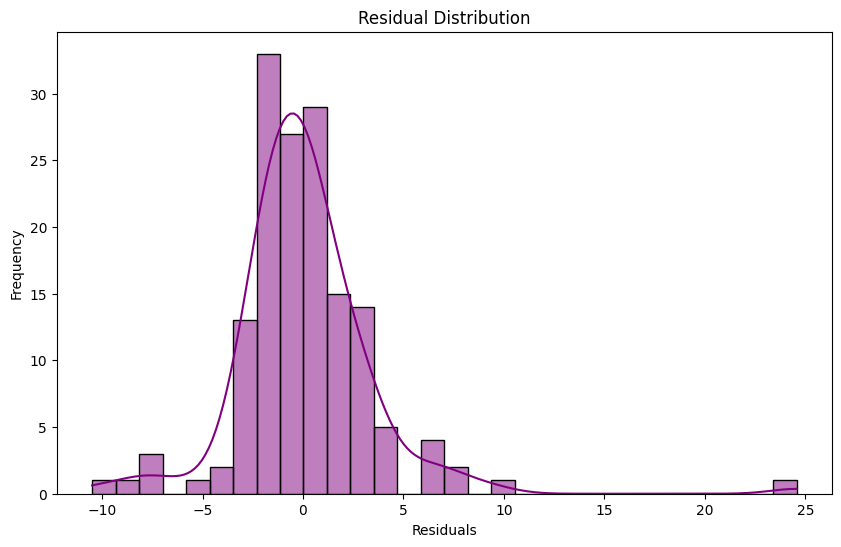

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

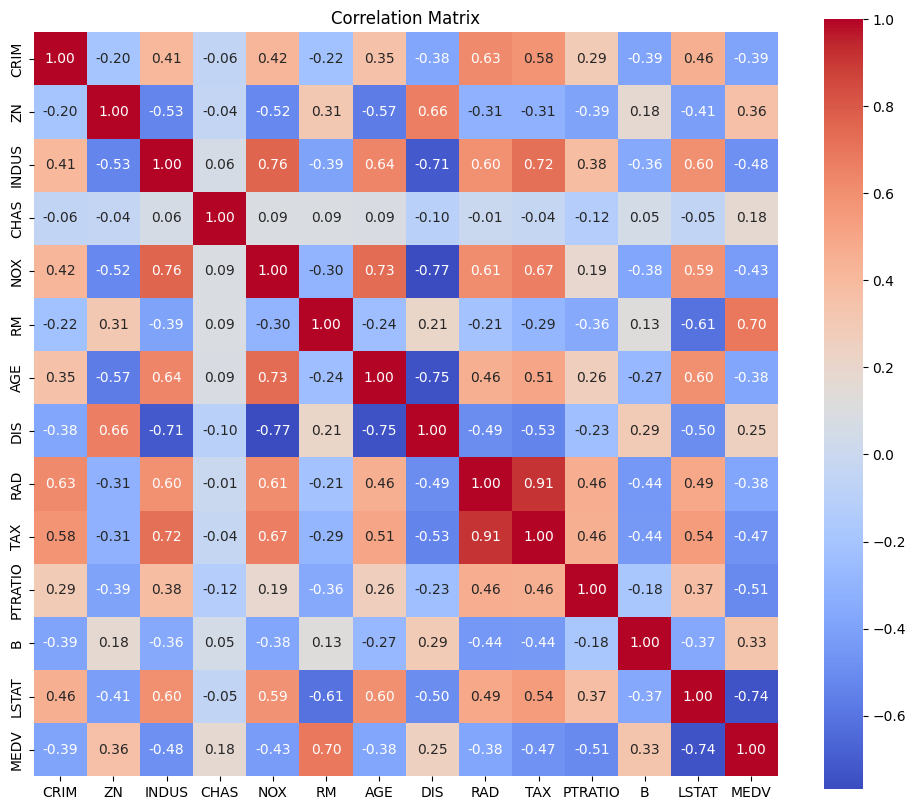

In [ ]:
# Correlation heatmap to explore relationships
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

### Improvement (Bonus) Part for Regularization Techniques (L1/L2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

In [ ]:
# Separate features and target variable
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]   # Target column (Median value of homes)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize two models for L1 and L2 regularization
# L1 Regularization (LinearSVR with L1 penalty, requires dual=False)
svm_l1 = LinearSVR(C=1.0, dual=False, loss='squared_epsilon_insensitive', epsilon=0.1)
svm_l1.fit(X_train_scaled, y_train)

LinearSVR(dual=False, epsilon=0.1, loss='squared_epsilon_insensitive')

In [ ]:
# L2 Regularization (default for LinearSVR)
svm_l2 = LinearSVR(C=1.0, loss='squared_epsilon_insensitive', epsilon=0.1)
svm_l2.fit(X_train_scaled, y_train)

LinearSVR(epsilon=0.1, loss='squared_epsilon_insensitive')

In [ ]:
# Make predictions
y_pred_l1 = svm_l1.predict(X_test_scaled)
y_pred_l2 = svm_l2.predict(X_test_scaled)

In [ ]:
# Evaluate L1 model
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
mse_l1 = mean_squared_error(y_test, y_pred_l1)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred_l1)

In [ ]:
# Evaluate L2 model
mae_l2 = mean_absolute_error(y_test, y_pred_l2)
mse_l2 = mean_squared_error(y_test, y_pred_l2)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred_l2)

In [ ]:
# Print comparison results
print("L1 Regularization Performance:")
print(f"MAE: {mae_l1}, MSE: {mse_l1}, RMSE: {rmse_l1}, R-squared: {r2_l1}\n")

print("L2 Regularization Performance:")
print(f"MAE: {mae_l2}, MSE: {mse_l2}, RMSE: {rmse_l2}, R-squared: {r2_l2}\n")

L1 Regularization Performance:
MAE: 3.1596708814412495, MSE: 21.52299203822397, RMSE: 4.6392878805075215, R-squared: 0.7111515516273152

L2 Regularization Performance:
MAE: 3.1596708814412495, MSE: 21.52299203822397, RMSE: 4.6392878805075215, R-squared: 0.7111515516273152



In [ ]:
# Performance metrics for L1 and L2 regularization
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
l1_values = [mae_l1, mse_l1, rmse_l1, r2_l1]
l2_values = [mae_l2, mse_l2, rmse_l2, r2_l2]

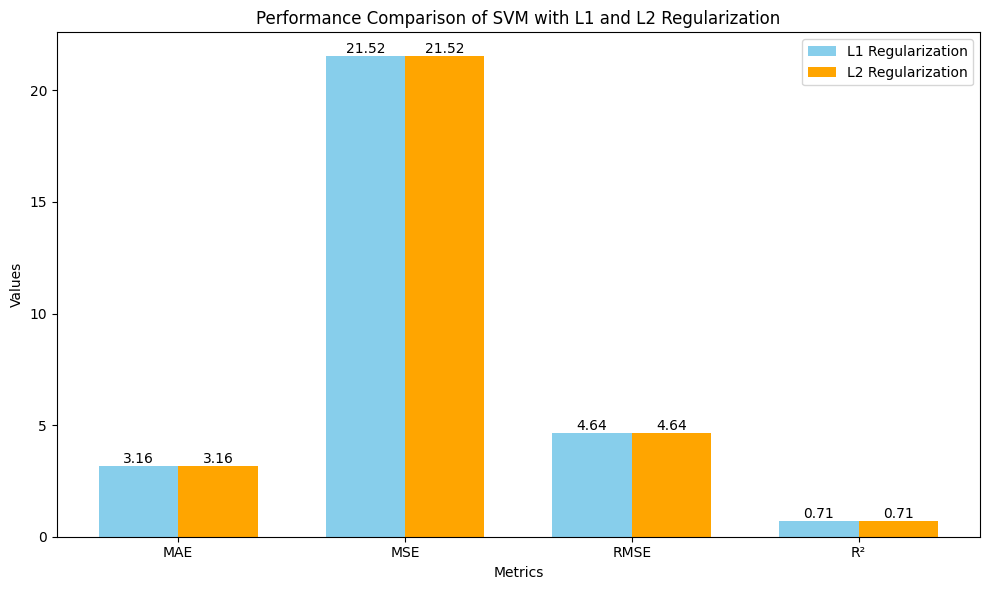

In [ ]:
# Create a bar plot
x = np.arange(len(metrics))  # Create an array for x positions
width = 0.35  # Width of the bars

# Create the bar plots for L1 and L2
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, l1_values, width, label='L1 Regularization', color='skyblue')
bars2 = ax.bar(x + width/2, l2_values, width, label='L2 Regularization', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Performance Comparison of SVM with L1 and L2 Regularization')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with the exact values
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

### *Happy Coding*